# DL4DS Tutorial (edited)

**NOTE:** This notebook is an updated version of the [DL4DS tutorial notebook](https://github.com/carlos-gg/dl4ds/blob/master/notebooks/DL4DS_tutorial.ipynb).

In this tutorial, we show one of the possible workflows of DL4DS. We do not aim to explore architectures, or to find the best network for the given dataset. This would require more computing power and an exhaustive exploration of the hyperparameters in DL4DS. Please read the paper and the documentation for an in-depth explanation of the library hyperparameters.

We proceed with the installation and import of DL4DS and other useful libraries.

## Pre-reqs: 

* Clone the dl4ds repository to your desired location on your computer (command: git clone https://github.com/carlos-gg/dl4ds.git)

* Create a new virtual enviornment to run the python code (command: conda create -n “insert name of new environment” python=3.8.13)

**NOTE:** Using Python version 3.8.13 because that is what the original tutorial notebook uses)

* Install jupyter lab (command: pip install jupyter lab)

* cd to the new dl4ds directory you cloned earlier and open jupyter lab (command: jupyter lab)

* You can edit their original notebook or create a new one like this

**NOTE:** A big difference between this notebook and the original is that the original notebook automatically installs and imports the dl4ds library. For some reason, maybe due to updates since the library is a few years old, the dl4ds and climetlab library conflict with another. When installing dl4ds, it requires tesorflow version 2.13.0, which causes an error when using climetlab's .to_xarray function. So the major change here is that we don't install and import dl4ds and tensorflow until after we retrieve the datasets and are done using climetlab.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Check Python version:
!python --version 

Python 3.8.18


In [3]:
#Install climetlab which is the library used to grab the sample dataset used in original tutorial
!pip install --quiet climetlab

In [4]:
#Also used to grab the sample dataset used in the original tutorial
!pip install --quiet climetlab_maelstrom_downscaling

In [25]:
#Stops a warning from appearing about outdates eccodes
!pip install --quiet --upgrade eccodes

In [5]:
import numpy as np
import xarray as xr
import ecubevis as ecv
import scipy as sp
import netCDF4 as nc
import climetlab as cml

# Data

We use the downscaling benchmark dataset provided by the MAELSTROM project: https://git.ecmwf.int/projects/MLFET/repos/maelstrom-downscaling-ap5/browse/notebooks/demo_downscaling_dataset.ipynb


**NOTE:** Anoter major change to this tutorial is that the original tutorial uses "maelstrom-downscaling" instead of "maelstrom-downscaling-tier1"

In [6]:
#Using climetlab to retrieve sample datsets
cmlds_train = cml.load_dataset("maelstrom-downscaling-tier1", dataset="training")
cmlds_val = cml.load_dataset("maelstrom-downscaling-tier1", dataset="validation")
cmlds_test = cml.load_dataset("maelstrom-downscaling-tier1", dataset="testing")

By downloading data from this dataset, you agree to the terms and conditions defined at https://git.ecmwf.int/projects/MLFET/repos/maelstrom-downscaling-ap5/browse/climetlab-maelstrom-downscaling-ap5/LICENSEIf you do not agree with such terms, do not download the data. 


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
#Examine the months used in this dataset
print(cmlds_train.all_datelist)

['2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09']


In [8]:
t2m_hr_train = cmlds_train.to_xarray().t2m_tar
t2m_hr_test = cmlds_test.to_xarray().t2m_tar
t2m_hr_val = cmlds_val.to_xarray().t2m_tar

t2m_lr_train = cmlds_train.to_xarray().t2m_in
t2m_lr_test = cmlds_test.to_xarray().t2m_in
t2m_lr_val = cmlds_val.to_xarray().t2m_in

z_hr_train = cmlds_train.to_xarray().z_tar
z_hr_test = cmlds_test.to_xarray().z_tar
z_hr_val = cmlds_val.to_xarray().z_tar

z_lr_train = cmlds_train.to_xarray().z_in
z_lr_test = cmlds_test.to_xarray().z_in
z_lr_val = cmlds_val.to_xarray().z_in

/Users/gabbyvaillant/miniconda3/envs/testing/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [9]:
z_hr_train

<xarray.DataArray 'z_tar' (time: 1464, lat: 96, lon: 128)>
dask.array<concatenate, shape=(1464, 96, 128), dtype=float64, chunksize=(62, 96, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-04-01 ... 2019-09-30T12:00:00
  * lon      (lon) float64 4.0 4.1 4.2 4.3 4.4 4.5 ... 16.3 16.4 16.5 16.6 16.7
  * lat      (lat) float64 54.5 54.4 54.3 54.2 54.1 ... 45.4 45.3 45.2 45.1 45.0
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

Now let's visualize the xr.Dataset for the t2m variable with ECUBEVIS (https://github.com/carlos-gg/ecubevis.git).

Variable name: t2m_tar, 2 metre temperature
Units: K
Dimensionality: 3D
Shape: (1402, 96, 128)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
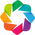

Column
    [0] WidgetBox(align=('center', 'start'))
        [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2016-04-01 ...]), value=numpy.datetime64('2016-04-..., width=250)
    [1] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='top', width=400)

In [10]:
ecv.plot(t2m_hr_train)

# Begin use of dl4ds library

Install and import dl4ds library and tensorflow. These are not done earlier due to the error caused when running.to_xarray function from the climetlab library.

In [11]:
!pip install --quiet dl4ds

In [12]:
import dl4ds as dds
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models

Here we take care of the scaling/normalization of values before training our networks. In this exmample, we center wrt the global mean and scale wrt the global standard deviation. 

In [13]:
t2m_scaler_train = dds.StandardScaler(axis=None)
t2m_scaler_train.fit(t2m_hr_train)  
y_train = t2m_scaler_train.transform(t2m_hr_train)
y_test = t2m_scaler_train.transform(t2m_hr_test)
y_val = t2m_scaler_train.transform(t2m_hr_val)

x_train = t2m_scaler_train.transform(t2m_lr_train)
x_test = t2m_scaler_train.transform(t2m_lr_test)
x_val = t2m_scaler_train.transform(t2m_lr_val)

z_scaler_train = dds.StandardScaler(axis=None)
z_scaler_train.fit(z_hr_train)  
y_z_train = z_scaler_train.transform(z_hr_train)
y_z_test = z_scaler_train.transform(z_hr_test)
y_z_val = z_scaler_train.transform(z_hr_val)

x_z_train = z_scaler_train.transform(z_lr_train)
x_z_test = z_scaler_train.transform(z_lr_test)
x_z_val = z_scaler_train.transform(z_lr_val)

Variable name: t2m_in, 2 metre temperature
Units: K
Dimensionality: 3D
Shape: (2, 96, 128)


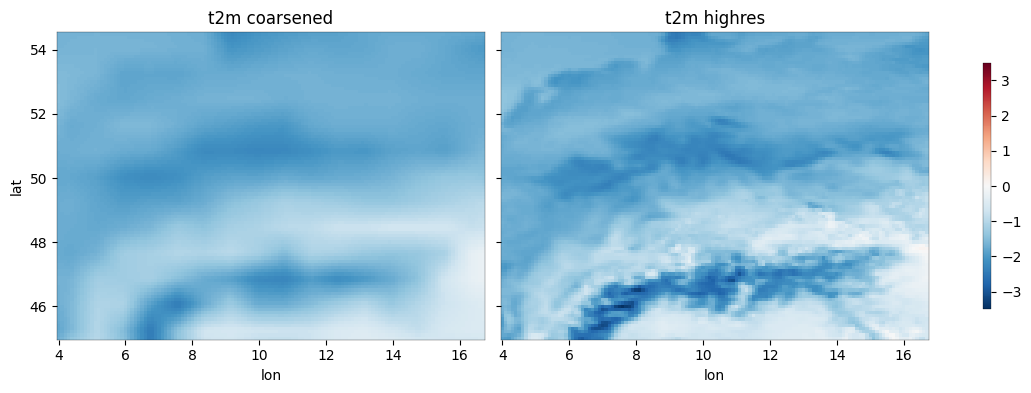

In [14]:
ecv.plot((x_train[0], y_train[0]), subplot_titles=('t2m coarsened', 't2m highres'))

Variable name: z_in, Geopotential
Units: m**2 s**-2
Dimensionality: 3D
Shape: (2, 96, 128)


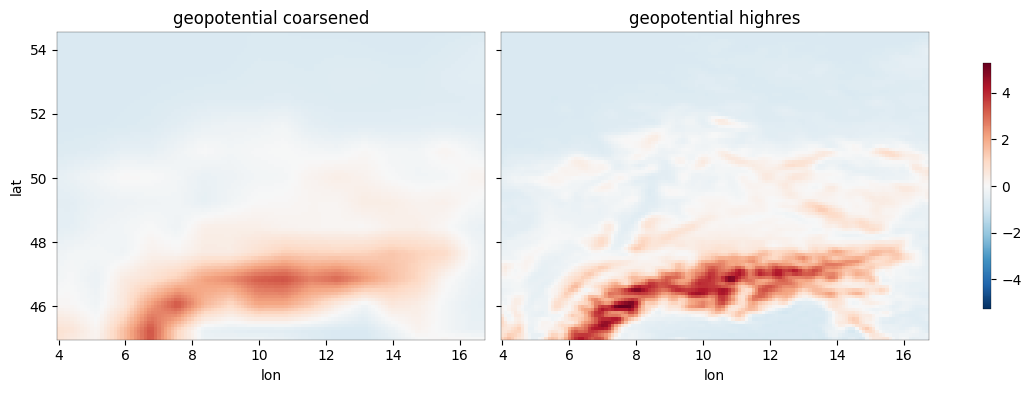

In [15]:
ecv.plot((x_z_train[0], y_z_train[0]), subplot_titles=('geopotential coarsened', 'geopotential highres'))

We add a last unitary dimension which we call ``channel``.

In [16]:
y_train = y_train.expand_dims(dim='channel', axis=-1)
y_test = y_test.expand_dims(dim='channel', axis=-1)
y_val = y_val.expand_dims(dim='channel', axis=-1)

x_train = x_train.expand_dims(dim='channel', axis=-1)
x_test = x_test.expand_dims(dim='channel', axis=-1)
x_val = x_val.expand_dims(dim='channel', axis=-1)

y_z_train = y_z_train.expand_dims(dim='channel', axis=-1)
y_z_test = y_z_test.expand_dims(dim='channel', axis=-1)
y_z_val = y_z_val.expand_dims(dim='channel', axis=-1)

x_z_train = x_z_train.expand_dims(dim='channel', axis=-1)
x_z_test = x_z_test.expand_dims(dim='channel', axis=-1)
x_z_val = x_z_val.expand_dims(dim='channel', axis=-1)

These are the resulting shapes of the input arrays:

In [17]:
print(y_train.shape, y_test.shape, y_val.shape)
print(x_train.shape, x_test.shape, x_val.shape)

print(x_z_train.shape, x_z_test.shape, x_z_val.shape)
print(y_z_train.shape, y_z_test.shape, y_z_val.shape)

(1402, 96, 128, 1) (180, 96, 128, 1) (186, 96, 128, 1)
(1464, 96, 128, 1) (180, 96, 128, 1) (186, 96, 128, 1)
(1464, 96, 128, 1) (180, 96, 128, 1) (186, 96, 128, 1)
(1464, 96, 128, 1) (180, 96, 128, 1) (186, 96, 128, 1)


# Training

For training, DL4DS takes:

* HR data _[mandatory, highres grid]_, 
* LR data _[optional, coarse grid]_, 
* static variables _[optional, highres grid]_,
* time-varyibng variables _[optional, coarse to highres grid]_. 

In this example, we do not use the LR data because it is just a coarsened version (via interpolation) of the HR t2m and z data. DL4DS carries out this interpolation on the fly by using the helping function ``dds.create_pair_hr_lr()`` (not to be called by the user). This process is done automatically inside the training loop (by calling one of the two Trainer classes in DL4DS), which we examplify here with the ``spc`` upsampling.

HR array: (96, 128, 1), LR array (12, 16, 2)


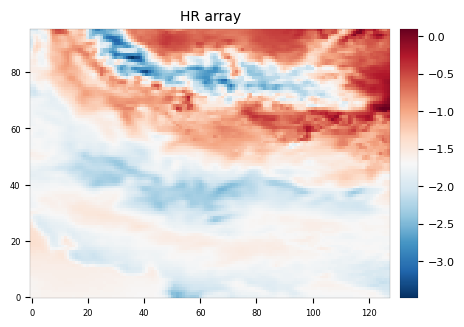

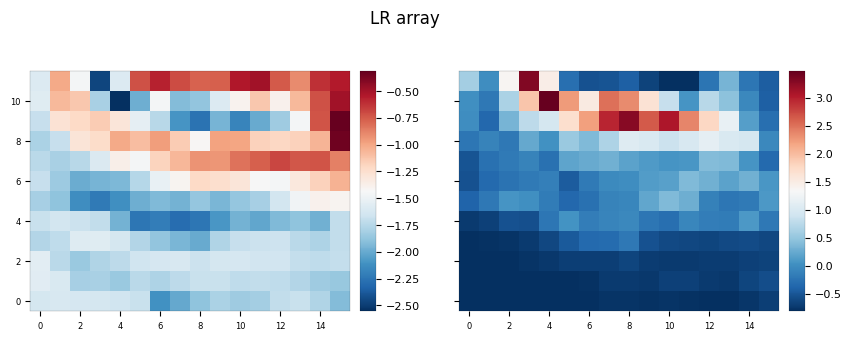

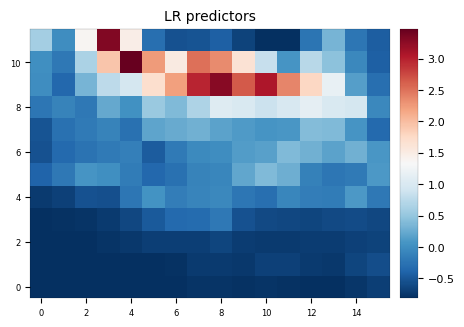

In [18]:
_ = dds.create_pair_hr_lr(y_train.values[0], None, 'spc', 8, None, None, y_z_train.values[0], None, True, interpolation='inter_area')


Below is an example of a call to the SupervisedTrainer class to run the training loop for 100 epochs. In this case, we train a network with a ResNet backbone, 8 residual blocks, in post-upsampling via subpixel convolution (implicit training pairs), and a localized convolutional block.

In [19]:
#This is not running correctly
ARCH_PARAMS = dict(n_filters=8,
                   n_blocks=8,
                   normalization=None,
                   dropout_rate=0.0,
                   dropout_variant='spatial',
                   attention=False,
                   activation='relu',
                   localcon_layer=True)

trainer = dds.SupervisedTrainer(
    backbone='resnet',
    upsampling='spc', 
    data_train=y_train, 
    data_val=y_val,
    data_test=y_test,
    data_train_lr=None, # here you can pass the LR dataset for training with explicit paired samples
    data_val_lr=None, # here you can pass the LR dataset for training with explicit paired samples
    data_test_lr=None, # here you can pass the LR dataset for training with explicit paired samples
    scale=8,
    time_window=None, 
    static_vars=None,
    predictors_train=[y_z_train],
    predictors_val=[y_z_val],
    predictors_test=[y_z_test],
    interpolation='inter_area',
    patch_size=None, 
    batch_size=60, 
    loss='mae',
    epochs=100, 
    steps_per_epoch=None, 
    validation_steps=None, 
    test_steps=None, 
    learning_rate=(1e-3, 1e-4), lr_decay_after=1e4,
    early_stopping=False, patience=6, min_delta=0, 
    save=False, 
    save_path=None,
    show_plot=True, verbose=True, 
    device='GPU', 
    **ARCH_PARAMS)

trainer.run()

List of devices:
[]
Number of devices: 0
Global batch size: 0
--------------------------------------------------------------------------------
Starting time: 2024-08-15 14:58:18
--------------------------------------------------------------------------------
Model: "resnet_spc"
______________________________________________________________________________________________________________________________________________________
 Layer (type)                                Output Shape                                 Param #        Connected to                                 
 input_1 (InputLayer)                        [(None, 12, 16, 2)]                          0              []                                           
                                                                                                                                                      
 conv2d (Conv2D)                             (None, 12, 16, 8)                            152            ['input_1[0]

ZeroDivisionError: integer division or modulo by zero

# Inference

Let's evaluate the results on holdout data -- the test split of the benchmark dataset that has not been used while training (updating the network weights).

In [20]:
pred = dds.Predictor(
    trainer, 
    y_test, 
    scale=8, 
    array_in_hr=True,
    static_vars=None, 
    predictors=[y_z_test], 
    time_window=None,
    interpolation='inter_area', 
    batch_size=8,
    scaler=t2m_scaler_train,
    save_path=None,
    save_fname=None,
    return_lr=True,
    device='CPU')

unscaled_y_pred, coarsened_array = pred.run()

--------------------------------------------------------------------------------
Starting time: 2024-08-15 15:01:08
--------------------------------------------------------------------------------
23/23 [==============================] - 2s 64ms/step
--------------------------------------------------------------------------------
Final running time: 0:00:02.332578
--------------------------------------------------------------------------------


Below is the coarsened version of the holdout, passed to the trained model for inference:

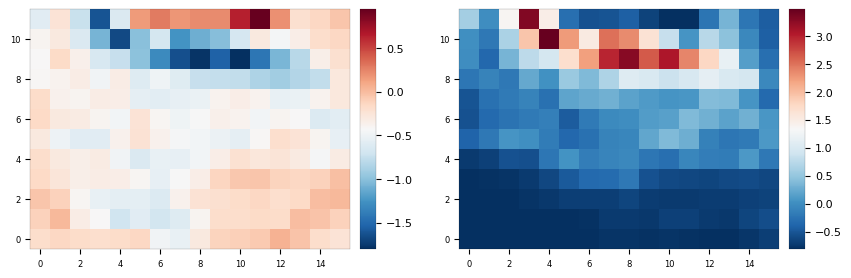

In [21]:
ind = 100
ecv.plot((coarsened_array[ind][:,:,0], coarsened_array[ind][:,:,1]))

In [22]:
unscaled_y_test = t2m_scaler_train.inverse_transform(y_test)

Finally, let's see compare the groundtruth HR t2m and the downscaled t2m obtained with DL4DS for a single time step.

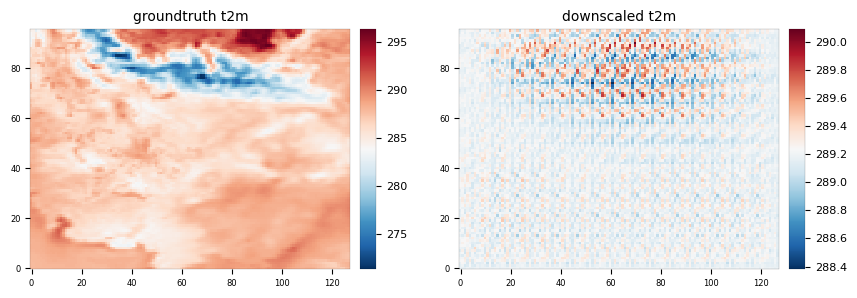

In [23]:
ecv.plot((unscaled_y_test[ind].values, unscaled_y_pred[ind]), subplot_titles=('groundtruth t2m', 'downscaled t2m'))
#This is not working right because the training cell didn't work correctly